[*********************100%***********************]  1 of 1 completed


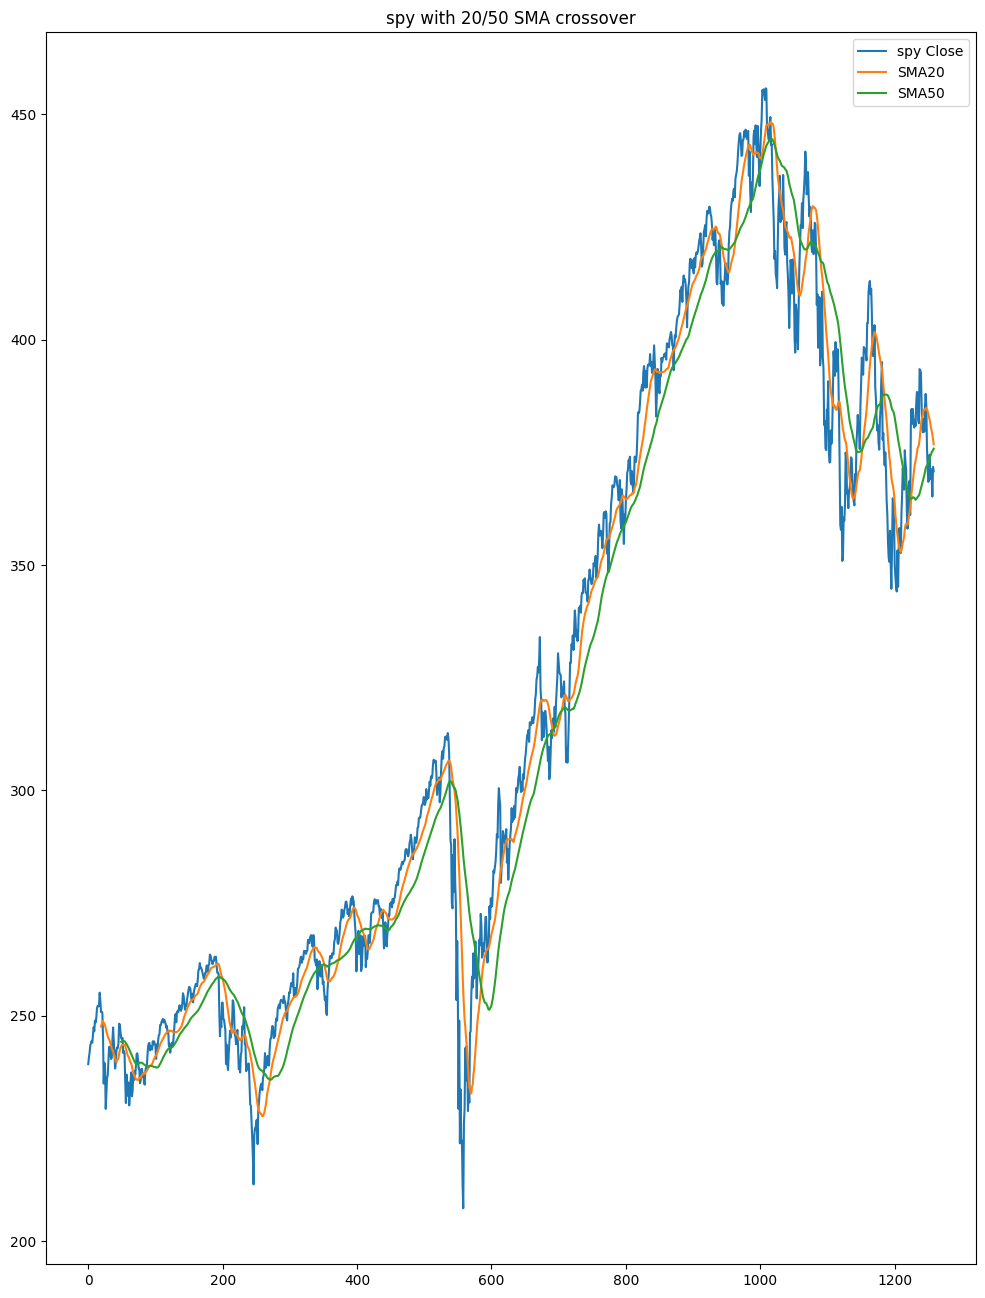

In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

spy = yf.download('SPY', start='2018-01-01', end='2023-01-01', group_by='ticker')
spy.columns = spy.columns.get_level_values(-1)  # flatten multilevel columns
spy = spy.reset_index()


#calculate 20 days and 50 days moving average
spy['SMA20'] = spy['Close'].rolling(window=20).mean()
spy['SMA50'] = spy['Close'].rolling(window=50).mean()

#Initialize signal column
spy['signal'] = 0

#Buy signal when SMA20 crosses above SMA50 
spy.loc[spy.index[20:], 'signal'] = (spy['SMA20'][20:] > spy['SMA50'][20:]).astype(int)

#Position: when signal changes (crossover points)
spy['position'] = spy['signal'].diff()


#plot
plt.figure(figsize=(12,16))
plt.plot(spy['Close'], label='spy Close')
plt.plot(spy['SMA20'], label='SMA20')
plt.plot(spy['SMA50'], label='SMA50')
plt.title("spy with 20/50 SMA crossover")
plt.legend()
plt.show()

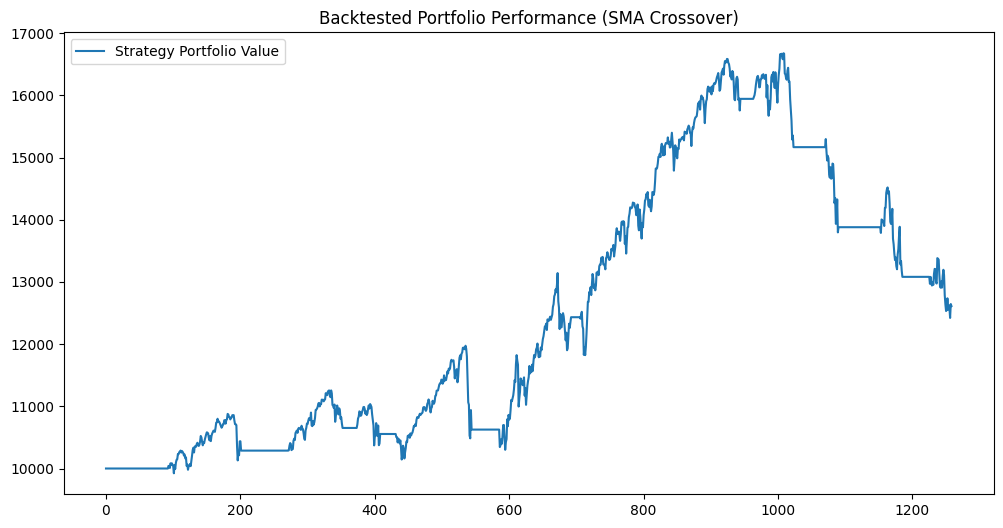

In [38]:
initial_cash = 10000
cash = initial_cash
holdings = 0
portfolio = []

for _, row in spy.iterrows():
    if row['position'] == 1 and cash > 0:
        holdings = cash / row['Close']
        cash = 0
    elif row['position'] == -1 and holdings > 0:
        cash = holdings * row['Close']
        holdings = 0
    total_value = cash + holdings * row['Close']
    portfolio.append(total_value)

spy['Portfolio Value'] = portfolio

plt.figure(figsize=(12, 6))
plt.plot(spy['Portfolio Value'], label='Strategy Portfolio Value')
plt.title('Backtested Portfolio Performance (SMA Crossover)')
plt.legend()
plt.show()


In [39]:
!pip install yfinance